In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función para leer el archivo de datos
def leer_datos(filename):
    data = np.loadtxt(filename)
    T, rm, rm2, error, mc_tau, c = data.T  # Transponer para asignar correctamente
    return T, rm, rm2, error, mc_tau, c

# Cargar los datos del primer archivo (fort.66)
filename1 = 'fort.66'
temperatura, magnetizacion, magnetizacion2, error, mc_tau, correlacion = leer_datos(filename1)

filename2 = 'fort.88'
magnetization_data = np.loadtxt(filename2)  

In [2]:
from matplotlib import rcParams as rc
rc.update({'font.size': 10,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })



# Parametros de fort.66 y fort.88

**temperatura**: Temperatura para la cual se termaliza el sistema. Cuando se termaliza se sacan los valores termodinamicos del sistema como un unico valor.

**magnetizacion**: data de magnetizacion (promedio).

**magnetizacion2**: Susceptibilidad magnética (varianza de la magnetización) $\chi = N(⟨m²⟩ − ⟨m⟩²)/T$.

**error**: Error estadístico estimado en la magnetizaci\'on.

**mc_tau**: Tiempo de autocorrelación integrado

**c**: Coeficiente de autocorrelación.

Los valores de magnetización instantaneos se obtienen en crudo directamente del algoritmo de metropolis y se guardan en el archivo 
de fort.88.

In [3]:
#Por ahora ni zorra que es esto.
 
# Parámetros adicionales
L_values = [20, 40, 80, 120, 160, 200]  # Tamaños de red usados en las figuras
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
J_k = 1.0  # Factor J/k para la ecuación de Onsager


import numpy as np

def magnetization_ising_2d(T, J=1, k=1):
    """
    Calcula la magnetización espontánea exacta para el modelo de Ising 2D.
    
    Parámetros:
        T : float or array-like
            Temperatura(s) en unidades de J/k (adimensional si J=1, k=1).
        J : float
            Constante de acoplamiento (default=1).
        k : float
            Constante de Boltzmann (default=1).
    
    Retorna:
        m0 : float or ndarray
            Magnetización espontánea (entre 0 y 1).
    """
    T = np.asarray(T)
    Tc = 2 * J / (k * np.log(1 + np.sqrt(2)))  # Temperatura crítica
    
    m0 = np.zeros_like(T)
    mask = (T <= Tc)  # Para T <= Tc
    
    sinh_term = np.sinh(2 * J / (k * T[mask])) ** -4
    m0[mask] = (1 - sinh_term) ** (1/8)
    
    return m0

osanger_T = np.linspace(0.1, 4, 100)

magnetization_ising_2d(osanger_T)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999999, 0.99999995,
       0.99999981, 0.99999939, 0.99999828, 0.99999576, 0.99999062,
       0.99998105, 0.99996444, 0.99993736, 0.99989542, 0.99983322,
       0.99974436, 0.99962142, 0.99945595, 0.99923851, 0.99895865,
       0.99860495, 0.99816497, 0.99762523, 0.99697118, 0.99618709,
       0.99525593, 0.99415924, 0.9928769 , 0.99138687, 0.98966486,
       0.98768393, 0.98541391, 0.98282075, 0.97986564, 0.97650384,
       0.97268321, 0.96834224, 0.96340726, 0.95778878, 0.95137607,
       0.94402947, 0.93556858, 0.92575401, 0.91425716, 0.90060779,
       0.8840957 , 0.86356701, 0.83693977, 0.79977821, 0.73911438,
       0.52211997, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

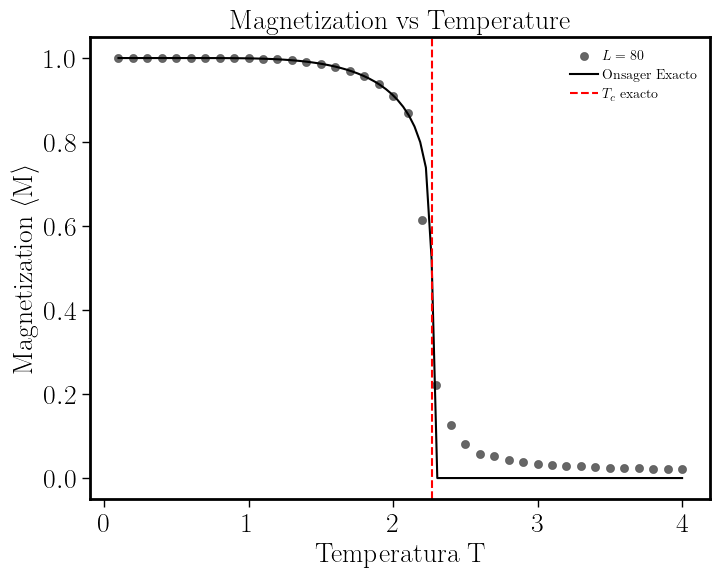

In [4]:
# Figura 8: Magnetización vs Temperatura
plt.figure(figsize=(8,6))
plt.scatter(temperatura, magnetizacion, alpha=0.6, color = 'black', edgecolors='black', linewidths=0.3, label = r'$L = 80$')
plt.plot(osanger_T, magnetization_ising_2d(osanger_T), '-', color='black', label="Onsager Exacto")
plt.axvline(Tc, linestyle='--', color='red', label="$T_c$ exacto")
plt.xlabel("Temperatura T", fontsize = 20)
plt.ylabel(" Magnetization ⟨M⟩", fontsize = 20)
plt.legend()
plt.title("Magnetization vs Temperature", fontsize = 20)
plt.show()

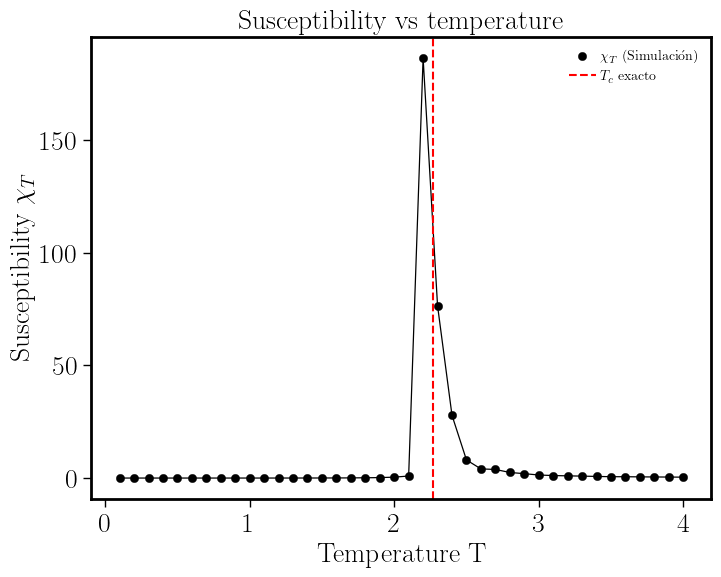

In [5]:

# Figura 9: Susceptibilidad vs Temperatura
susceptibilidad = magnetizacion2*6400 / temperatura
plt.figure(figsize=(8,6))
plt.scatter(temperatura, susceptibilidad, color = 'black', edgecolors='black', linewidths=0.3, label="$\chi_T$ (Simulación)")
plt.plot(temperatura, susceptibilidad, color = 'black', lw = 0.9)
plt.axvline(Tc, linestyle='--', color='red', label="$T_c$ exacto")
plt.xlabel("Temperature T", fontsize = 20)
plt.ylabel("Susceptibility $\chi_T$", fontsize = 20)
plt.legend()
plt.title("Susceptibility vs temperature", fontsize = 20)
plt.show()

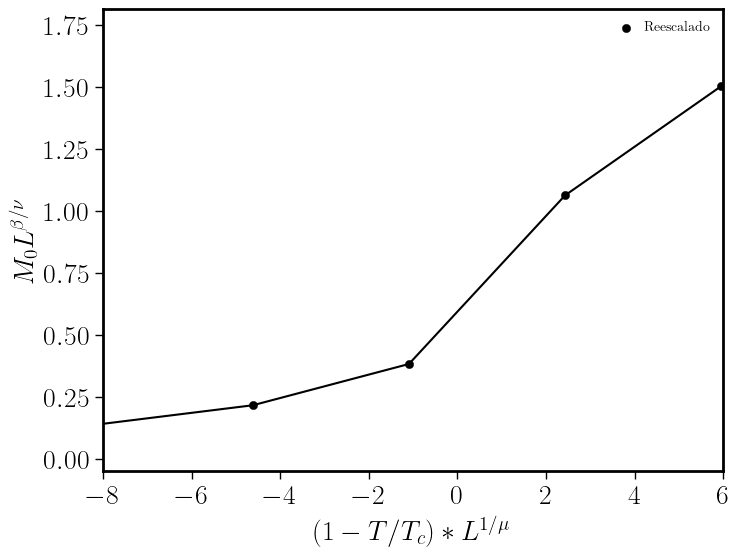

In [6]:
# Figura 10: Magnetización reescalada
beta_nu = 1/8 / (1.0)  # Ajusta según corresponda
plt.figure(figsize=(8,6))
plt.scatter((1-temperatura/Tc)*80, magnetizacion*80**beta_nu, color = 'black', edgecolors='black', linewidths=0.3, label="Reescalado")
plt.plot((1-temperatura/Tc)*80, magnetizacion*80**beta_nu, color = 'black')
plt.xlabel(r"$(1 - T/T_c)*L^{1/\mu}$", fontsize = 20)
plt.ylabel(r"$M_0 L^{\beta/\nu}$", fontsize = 20)
plt.legend()
plt.xlim(-8, 6)
plt.show()


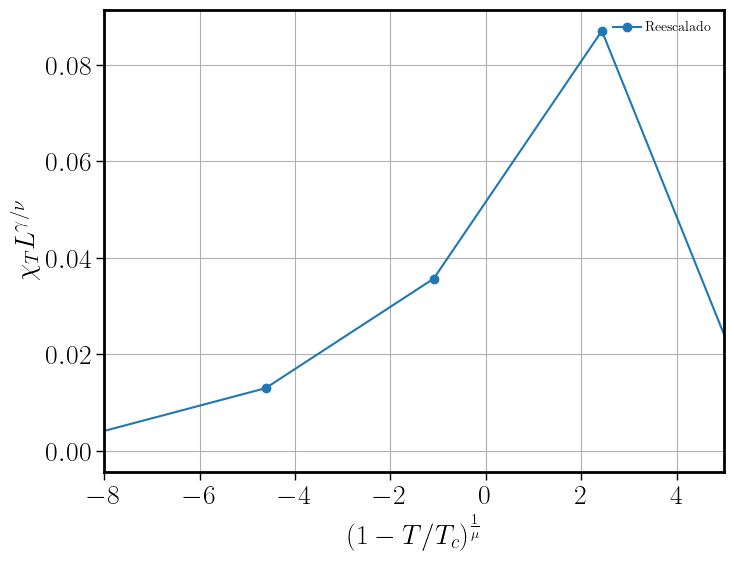

In [8]:


# Figura 11: Susceptibilidad reescalada
plt.figure(figsize=(8,6))
plt.plot((1-temperatura/Tc)*80, susceptibilidad*80**(-7/4), 'o-', label="Reescalado")
plt.xlabel(r"$(1 - T/T_c)^\frac{1}{\mu}$", fontsize = 20)
plt.ylabel(r"$\chi_{T} L^{\gamma/\nu}$", fontsize = 20)
plt.legend()
plt.xlim(-8, 5)
plt.grid()
plt.show()